In [1]:
import numpy as np
import pandas as pd
import IPython
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import session_info

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("labelled_dysx.csv")
data

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2
...,...,...,...,...,...,...,...
495,0.4,0.3,0.1,0.4,0.2,0.5,0
496,0.4,0.6,0.5,0.6,0.5,0.4,1
497,0.7,0.5,0.8,0.9,0.8,0.5,1
498,0.3,0.5,0.4,0.6,0.6,0.6,1


# 0 = DYSLEXIC
# 1 = Unsure
# 2 = NOT DYSLEXIC

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Language_vocab         500 non-null    float64
 1   Memory                 500 non-null    float64
 2   Speed                  500 non-null    float64
 3   Visual_discrimination  500 non-null    float64
 4   Audio_Discrimination   500 non-null    float64
 5   Survey_Score           500 non-null    float64
 6   Label                  500 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


Target variable count in the data:

Label
1    273
2    165
0     62
Name: count, dtype: int64




<Axes: xlabel='Label', ylabel='count'>

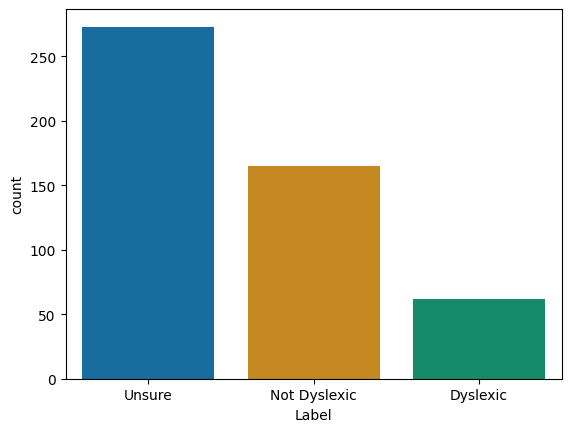

In [4]:
y=data.Label
X=data.drop(['Label'],axis=1)

print("Target variable count in the data:\n")
print(data['Label'].value_counts())
print('\n')

s= pd.Series(data['Label'])
j = s.map({1: 'Unsure', 0: 'Dyslexic', 2 : 'Not Dyslexic'})
#Bar Plot of the Target Variable
sns.countplot(x =j, data = data, palette='colorblind', orient='h', hue=j)

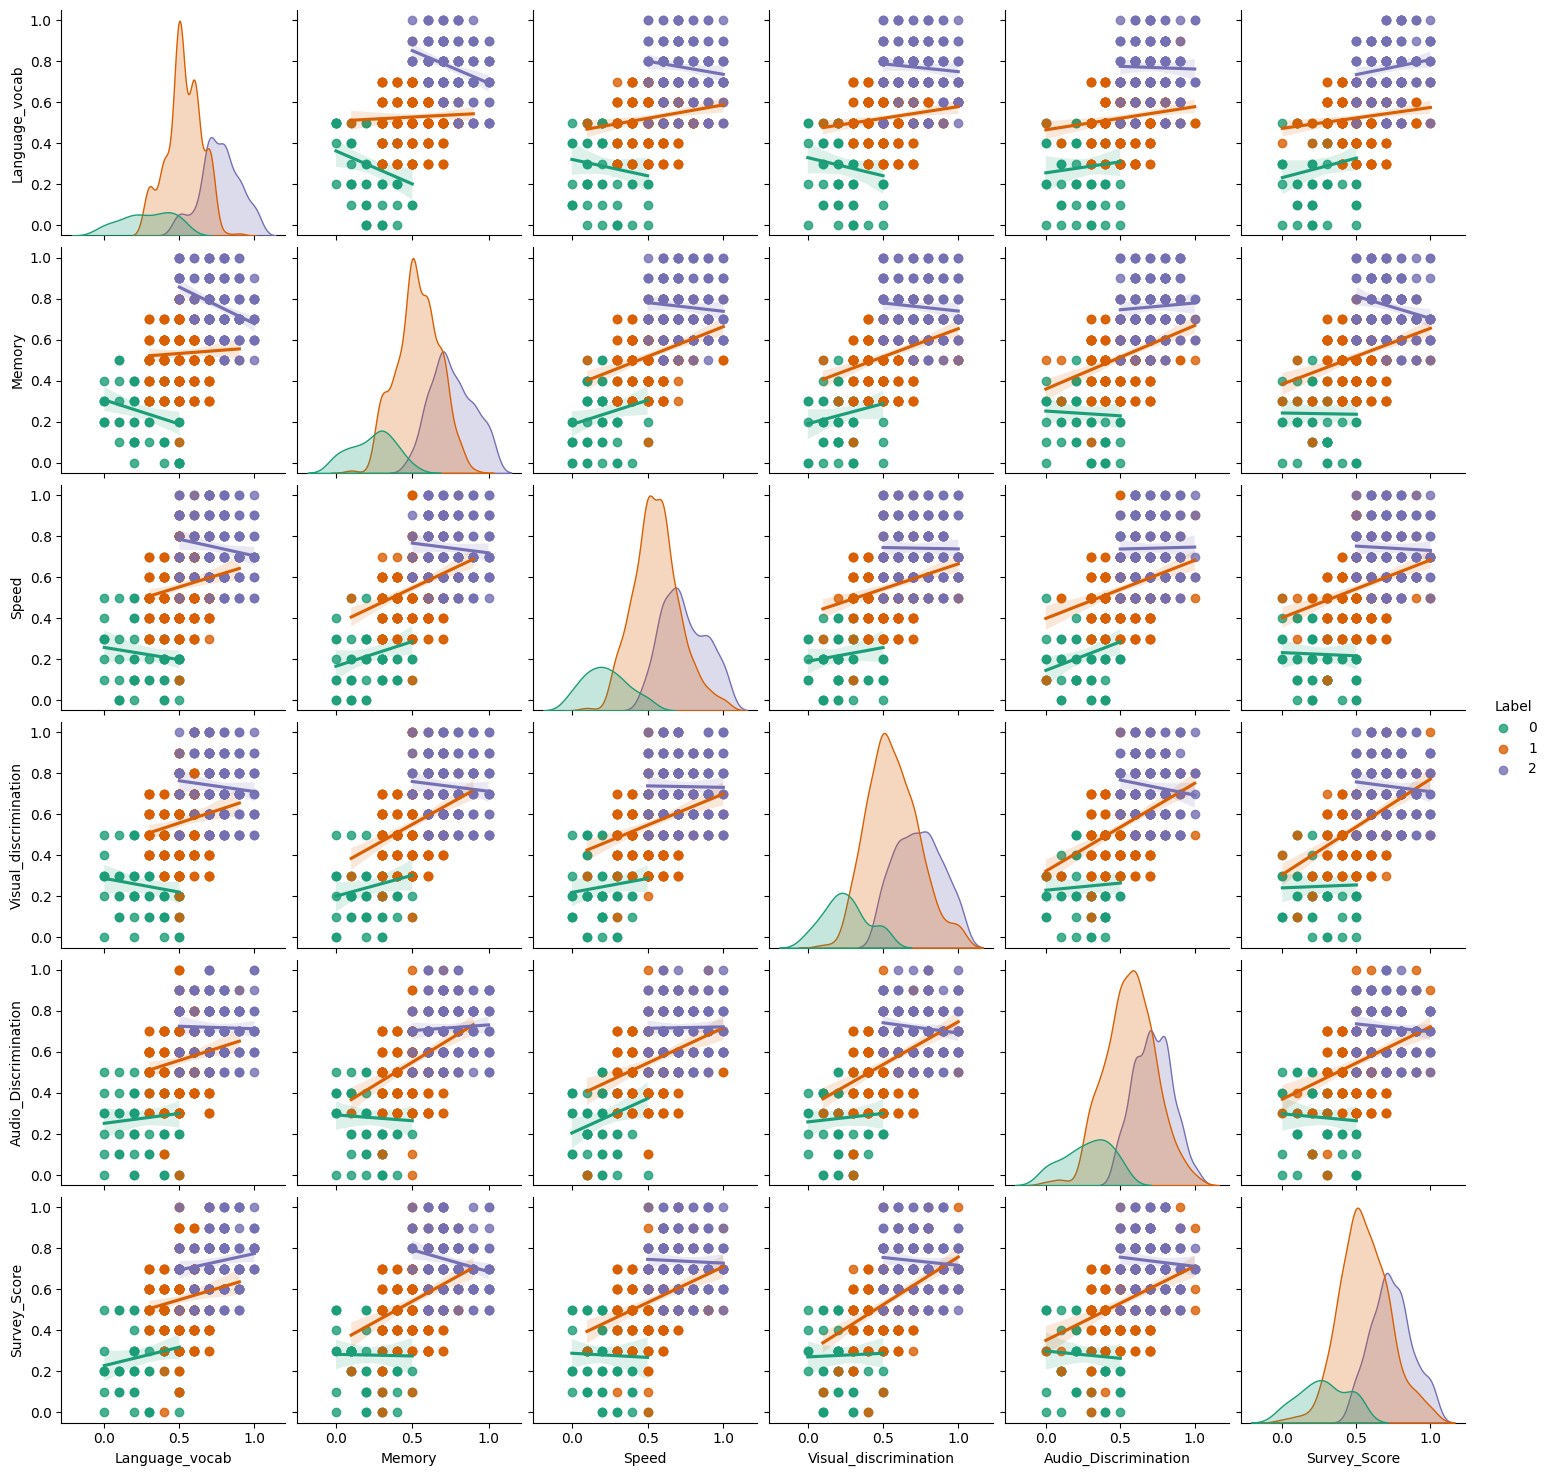

In [6]:
#Pair plot to get the insight of the data distribution
sns.pairplot(data, hue='Label',palette='Dark2', kind = 'reg')

In [7]:
# Splittting the data into Test dataset and train dataset 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Stadardization of the data
sc=StandardScaler(copy=False)
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.41805658,  0.10292932,  0.58524582,  0.98148148,  0.57895881,
         0.53989757],
       [ 2.11561967,  0.57616758, -0.36060601,  0.05555556,  0.07985639,
         0.53989757],
       [ 0.08867867,  0.10292932,  0.1123199 , -1.33333333, -0.41924604,
         0.06105272],
       [-1.43152708, -1.31678545, -0.36060601, -0.40740741,  0.07985639,
         0.53989757],
       [-1.43152708, -1.31678545, -1.30645784, -1.7962963 , -0.91834846,
        -1.85432668],
       [-0.41805658,  0.57616758,  1.53109765, -0.40740741, -0.41924604,
         1.01874242],
       [ 1.60888442,  0.57616758,  1.05817173,  0.98148148,  1.07806123,
         0.53989757],
       [-0.92479183, -1.31678545, -2.25230967, -0.87037037, -1.9165533 ,
        -0.41779213],
       [-1.43152708,  0.10292932, -0.36060601, -0.87037037, -1.41745088,
        -0.41779213],
       [-0.92479183, -2.26326196, -1.30645784, -1.7962963 , -1.41745088,
        -1.37548183],
       [ 0.08867867,  0.57616758,  0.1123199 ,  0.

# Baseline (Majority Classifier)

In [8]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)
baseline_prediction = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, baseline_prediction)
target_names = ['Dyslexic', 'Unsure', 'Not Dyslexic']
report = classification_report(y_test, baseline_prediction, target_names=target_names)

print('Baseline Accuracy:',accuracy)
print(report)

Baseline Accuracy: 0.55
              precision    recall  f1-score   support

    Dyslexic       0.00      0.00      0.00        15
      Unsure       0.55      1.00      0.71        55
Not Dyslexic       0.00      0.00      0.00        30

    accuracy                           0.55       100
   macro avg       0.18      0.33      0.24       100
weighted avg       0.30      0.55      0.39       100



C:\Users\razic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\razic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\razic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Support Vector Machine 'Linear' Kernel

In [9]:
clf2 = SVC(kernel='linear')
clf2.fit(X_train,y_train)
prediction2 = clf2.predict(X_test)

# Classification report for SVM linear kernel 
print(classification_report(y_test, prediction2, target_names=target_names))

              precision    recall  f1-score   support

    Dyslexic       0.88      1.00      0.94        15
      Unsure       1.00      0.91      0.95        55
Not Dyslexic       0.91      1.00      0.95        30

    accuracy                           0.95       100
   macro avg       0.93      0.97      0.95       100
weighted avg       0.96      0.95      0.95       100



Text(45.72222222222221, 0.5, 'Actual Values')

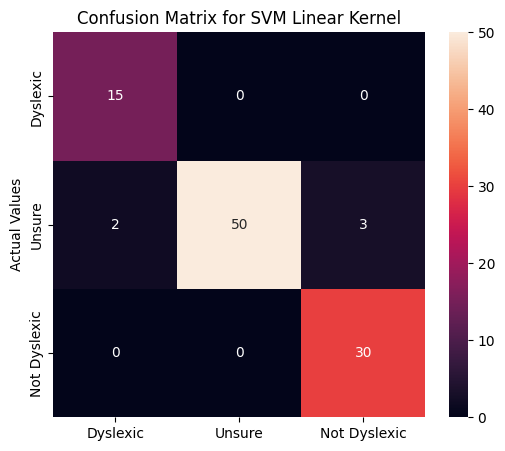

In [10]:
## Confusion Matrix for SVM Linear Kernel

from sklearn.metrics import confusion_matrix

cm_svm1 = confusion_matrix(y_test, prediction2)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df3 = pd.DataFrame(cm_svm1,
                     index = ['Dyslexic', 'Unsure', 'Not Dyslexic'], 
                     columns = ['Dyslexic', 'Unsure', 'Not Dyslexic'])

#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix for SVM Linear Kernel')
plt.ylabel('Actual Values')

# Random Forest Classifier

In [11]:
clf1=RandomForestClassifier(random_state=0)
clf1.fit(X_train,y_train)
prediction1 =clf1.predict(X_test)

In [12]:
# Classification Report for RF


print(classification_report(y_test, prediction1, target_names=target_names))

              precision    recall  f1-score   support

    Dyslexic       1.00      1.00      1.00        15
      Unsure       0.95      0.98      0.96        55
Not Dyslexic       0.96      0.90      0.93        30

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.96      0.96      0.96       100



Text(45.72222222222221, 0.5, 'Actual Values')

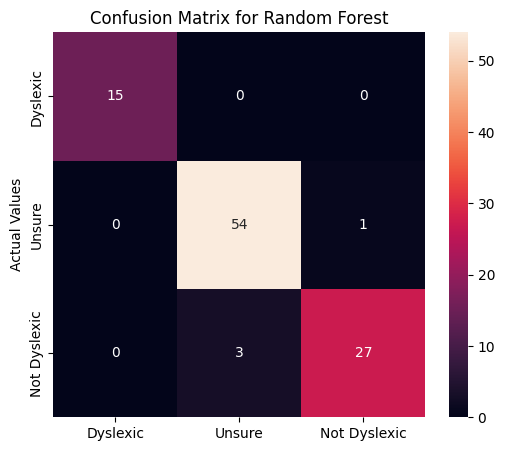

In [13]:
## Confusion Matrix for RF

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, prediction1)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df1 = pd.DataFrame(cm_rf,
                     index = ['Dyslexic', 'Unsure', 'Not Dyslexic'], 
                     columns = ['Dyslexic', 'Unsure', 'Not Dyslexic'])

#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df1, annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Values')

# Random Forest with GridSearchCV

In [14]:
# Grid Parameters 

RFC_Grid_Params = {'n_estimators' : [10, 200, 600, 1000]}

# RFC with Grid Parameters model fit
RFC_grid = GridSearchCV(RandomForestClassifier(random_state = 0), 
                        RFC_Grid_Params, 
                        refit=True, 
                        verbose=2)
RFC_grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=600; total time=   1.3s
[CV] END ...................................n_est

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [10, 200, 600, 1000]}, verbose=2)

In [15]:
# Printing the Best Parameter
print("Best Parameters: ", RFC_grid.best_estimator_)
print("\n")

# Mean test score for estimators
means1 = RFC_grid.cv_results_['mean_test_score']
for mean1, params1 in zip(means1, RFC_grid.cv_results_['params']):
        print("%0.3f for %r"% (mean1, params1))

Best Parameters:  RandomForestClassifier(n_estimators=200, random_state=0)


0.935 for {'n_estimators': 10}
0.945 for {'n_estimators': 200}
0.945 for {'n_estimators': 600}
0.945 for {'n_estimators': 1000}


In [16]:
RFC_grid_predictions = RFC_grid.predict(X_test)

# Classification report for RFC GridSearch
print(classification_report(y_test, RFC_grid_predictions, target_names = target_names))

              precision    recall  f1-score   support

    Dyslexic       1.00      1.00      1.00        15
      Unsure       0.95      0.98      0.96        55
Not Dyslexic       0.96      0.90      0.93        30

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.96      0.96      0.96       100



Text(45.72222222222221, 0.5, 'Actual Values')

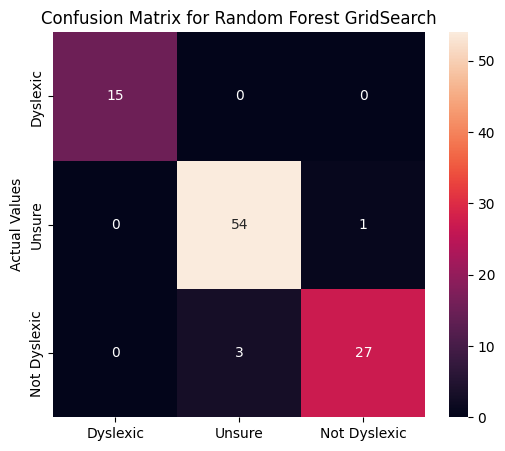

In [17]:
## Confusion Matrix for RFC GridSearch

from sklearn.metrics import confusion_matrix

cm_rf_grid = confusion_matrix(y_test, prediction1)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df2 = pd.DataFrame(cm_rf_grid,
                     index = ['Dyslexic', 'Unsure', 'Not Dyslexic'], 
                     columns = ['Dyslexic', 'Unsure', 'Not Dyslexic'])

#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix for Random Forest GridSearch')
plt.ylabel('Actual Values')

# Support Vector Machine 'RBF' Kernel

In [18]:
clf3 = SVC(kernel='rbf')
clf3.fit(X_train,y_train)
prediction3 = clf3.predict(X_test)

# Classification report for SVM 'rbf' kernel 
print(classification_report(y_test, prediction3, target_names=target_names))

              precision    recall  f1-score   support

    Dyslexic       1.00      1.00      1.00        15
      Unsure       1.00      0.96      0.98        55
Not Dyslexic       0.94      1.00      0.97        30

    accuracy                           0.98       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



Text(45.72222222222221, 0.5, 'Actual Values')

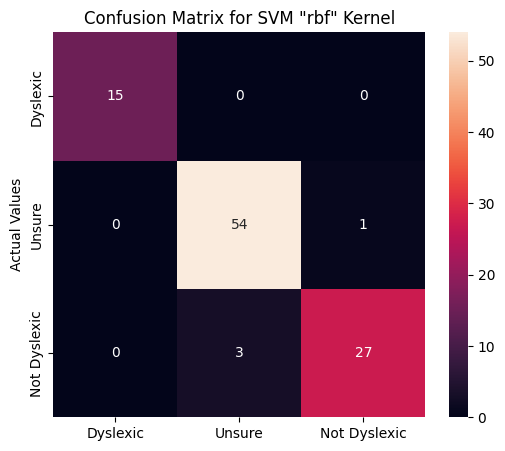

In [19]:
## Confusion Matrix for SVM 'rbf' Kernel

from sklearn.metrics import confusion_matrix

cm_svm2 = confusion_matrix(y_test, prediction1)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df4 = pd.DataFrame(cm_svm2,
                     index = ['Dyslexic', 'Unsure', 'Not Dyslexic'], 
                     columns = ['Dyslexic', 'Unsure', 'Not Dyslexic'])

#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df4, annot=True)
plt.title('Confusion Matrix for SVM ''"rbf"'' Kernel')
plt.ylabel('Actual Values')

# Grid Search with SVM

In [20]:
# parameters for SVM GridSearch
param_grid = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']},
              {'C': [0.1, 1, 10, 100,1000], 'kernel' : ['linear']}]

# SVM GridSearch model fit
svm_grid = GridSearchCV(SVC(),
                    param_grid,
                    refit=True,
                    verbose=2)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=2)

In [21]:
# Printing the best parameter obtained from SVM GridSearch model
print("Best Parameters: ", svm_grid.best_estimator_)

#Prediction of the model
grid_predictions = svm_grid.predict(X_test)

Best Parameters:  SVC(C=1, gamma=0.1)


In [22]:
# Classification report for SVM GridSearch
print(classification_report(y_test, grid_predictions, target_names = target_names))

              precision    recall  f1-score   support

    Dyslexic       1.00      1.00      1.00        15
      Unsure       1.00      0.96      0.98        55
Not Dyslexic       0.94      1.00      0.97        30

    accuracy                           0.98       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



Text(45.72222222222221, 0.5, 'Actual Values')

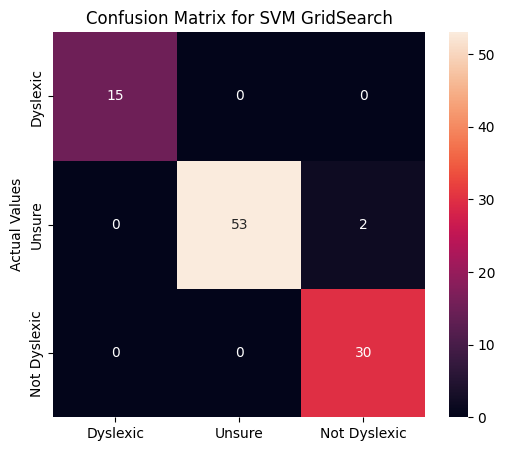

In [23]:
## Confusion Matrix for SVM Grid

from sklearn.metrics import confusion_matrix

cm_svc_grid = confusion_matrix(y_test, grid_predictions)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df5 = pd.DataFrame(cm_svc_grid,
                     index = ['Dyslexic', 'Unsure', 'Not Dyslexic'], 
                     columns = ['Dyslexic', 'Unsure', 'Not Dyslexic'])

#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df5, annot=True)
plt.title('Confusion Matrix for SVM GridSearch')
plt.ylabel('Actual Values')

##### For Class 0
##### TP = cell 1
##### FN = (cell 2 + cell 3)
##### FP = (cell 4 + cell 7) 
##### TN = (cell 5 + cell 6 + cell 8 + cell 9)

C:\Users\razic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

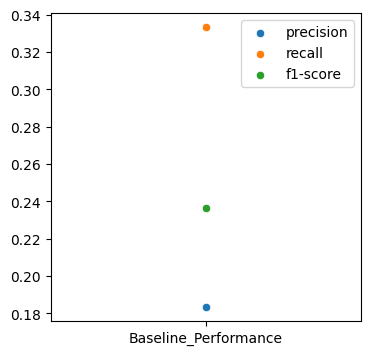

In [24]:
prec_base = [0]
rec_base = [0]
f1_base = [0]
prec_base[0],rec_base[0],f1_base[0],_= precision_recall_fscore_support(y_test, baseline_prediction, average = 'macro')
plt.figure(figsize=(4,4))
sns.scatterplot(x= ['Baseline_Performance'],y=prec_base[0], label='precision')
sns.scatterplot(x= ['Baseline_Performance'], y=rec_base[0], label='recall')
sns.scatterplot(x= ['Baseline_Performance'], y=f1_base[0], label='f1-score')

<Axes: >

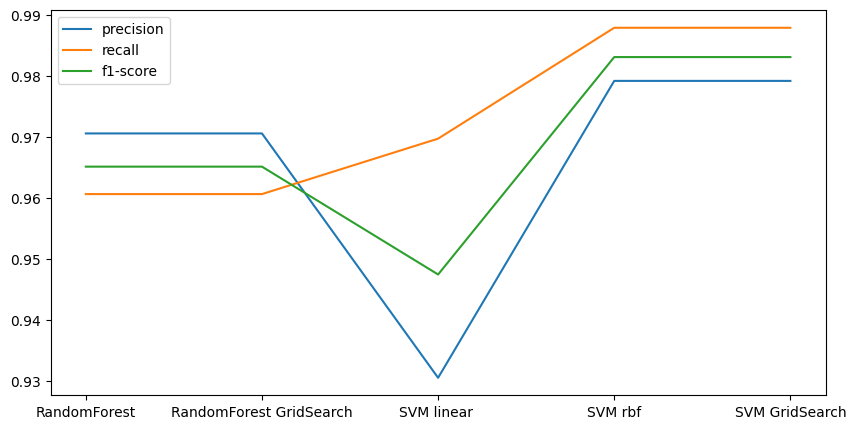

In [25]:
## Precision, Recall, f1-score PLOT

prec=[0,
      0,
      0,
      0,
      0]
rec=[0,
     0,
     0,
     0,
     0]
f1=[0,
    0,
    0,
    0,
    0]

prec[0],rec[0],f1[0],_= precision_recall_fscore_support(y_test, prediction1, average = 'macro')
prec[1],rec[1],f1[1],_= precision_recall_fscore_support(y_test, RFC_grid_predictions, average = 'macro')
prec[2],rec[2],f1[2],_= precision_recall_fscore_support(y_test, prediction2, average = 'macro')
prec[3],rec[3],f1[3],_= precision_recall_fscore_support(y_test, prediction3, average = 'macro')
prec[4],rec[4],f1[4],_= precision_recall_fscore_support(y_test, grid_predictions, average = 'macro')


## Plotting using seaborn

plt.figure(figsize=(10,5))
sns.lineplot(x= ['RandomForest', 'RandomForest GridSearch', 'SVM linear ', 'SVM rbf', 'SVM GridSearch'],
             y=prec,
             label='precision')
sns.lineplot(x= ['RandomForest', 'RandomForest GridSearch', 'SVM linear ', 'SVM rbf', 'SVM GridSearch'], 
             y=rec, 
             label='recall')
sns.lineplot(x= ['RandomForest', 'RandomForest GridSearch', 'SVM linear ', 'SVM rbf', 'SVM GridSearch'], 
             y=f1, 
             label='f1-score')

# Creating Questions and Scoring Based on Accuracy Time Taken to Answer the questions

In [26]:
#Creating a empty dataframe
results_df = pd.DataFrame(columns=['Language_vocab', 'Memory', 'Speed', 'Visual_discrimination',
                                   'Audio_Discrimination', 'Survey_Score'])

In [27]:
import time

# Define a list of multiple-choice questions
questions = ['Choose the correct spelling:', 'Solve the following equation: 5x + 7 = 22', 
            '''
Read the Story and Answer the following: 
            In the depths of the Amazon rainforest, there lived a tribe of 
            indigenous people known as the Yanomami. Their way of life was 
            threatened by illegal gold mining and deforestation, which caused 
            the destruction of their land and water sources. The Yanomami 
            fought against the mining companies and the government, but they 
            were met with violence and intimidation. One day, a young Yanomami 
            woman named Maira decided to take matters into her own hands. She 
            traveled to the city and spoke out about the plight of her people, 
            bringing international attention to their struggle. With the help 
            of environmental activists and human rights organizations, the Yanomami 
            were able to win a legal battle to protect their land and preserve their way of life.

Type A in the answer if you've finished reading:
            ''', 
'What threatened the way of life of the Yanomami people?', 'What did Maira do to help her people?']

# Define a list of answer choices for each question
answer_choices = [['A. Necessery', 'B. Necesary', 'C. Necessary', 'D. Neccesary'],
                  ['A. x = 4', 'B. x = 3', 'C. x = 5', 'D. x = 2'],
                  ['A. A', 'B. B', 'C. C', 'D. D'],
                  ['A. Drought and famine', 'B. Illegal gold mining and deforestation', 'C. War and conflict', 'D. Disease and epidemics'],
                  ['A. She started a protest march in the rainforest', 'B. She negotiated with the government to protect their land', 'C. She organized a rebellion against the mining companies', 'D. She traveled to the city and spoke out about their plight'],
                 ]

# Define a list of correct answers for each question
correct_answers = ['C', 'B', 'A', 'B', 'D']

# Define a dictionary to store the time taken to answer each question
time_taken = {}
scored = {}
# Loop through each question
for i in range(len(questions)):
    print("\n",questions[i])
    for j in range(len(answer_choices[i])):
        print("\n",answer_choices[i][j])

    # Get the start time
    start_time = time.time()

    # Get the user's answer
    user_answer = input("\nEnter your answer in Capital Alphabet: (A/B/C/D): ")

    # Get the end time
    end_time = time.time()

    # Calculate the time taken to answer the question
    time_taken[i+1] = end_time - start_time

    # Set the maximum time allowed to answer the questioN
    max_time = 6
    
    # Check if the user's answer is correct
    if user_answer.upper() == correct_answers[i]:
        print("\nCorrect!")
        if time_taken[i+1] <= max_time:
            score = 1.0
        elif time_taken[i+1] > max_time and time_taken[i+1] < 10:
            score = 0.7
        elif time_taken[i+1] > 10:
            score = 0.5
    else:
        print("\nIncorrect.")
        score = 0
            
        # Store the score
    scored[i] = score

# Print the time taken to answer each question
print("\nTime taken to answer each question:")
for i in range(len(questions)):
    print("Question {}: {:.2f} seconds".format(i+1, time_taken[i+1]))



 Choose the correct spelling:

 A. Necessery

 B. Necesary

 C. Necessary

 D. Neccesary



Enter your answer in Capital Alphabet: (A/B/C/D):  A



Incorrect.

 Solve the following equation: 5x + 7 = 22

 A. x = 4

 B. x = 3

 C. x = 5

 D. x = 2



Enter your answer in Capital Alphabet: (A/B/C/D):  B



Correct!

 
Read the Story and Answer the following: 
            In the depths of the Amazon rainforest, there lived a tribe of 
            indigenous people known as the Yanomami. Their way of life was 
            threatened by illegal gold mining and deforestation, which caused 
            the destruction of their land and water sources. The Yanomami 
            fought against the mining companies and the government, but they 
            were met with violence and intimidation. One day, a young Yanomami 
            woman named Maira decided to take matters into her own hands. She 
            traveled to the city and spoke out about the plight of her people, 
            bringing international attention to their struggle. With the help 
            of environmental activists and human rights organizations, the Yanomami 
            were able to win a legal battle to protect their land and preserve their way of life.

Type A in the answer if you've finished reading:
          


Enter your answer in Capital Alphabet: (A/B/C/D):  C



Incorrect.

 What threatened the way of life of the Yanomami people?

 A. Drought and famine

 B. Illegal gold mining and deforestation

 C. War and conflict

 D. Disease and epidemics



Enter your answer in Capital Alphabet: (A/B/C/D):  A



Incorrect.

 What did Maira do to help her people?

 A. She started a protest march in the rainforest

 B. She negotiated with the government to protect their land

 C. She organized a rebellion against the mining companies

 D. She traveled to the city and spoke out about their plight



Enter your answer in Capital Alphabet: (A/B/C/D):  A



Incorrect.

Time taken to answer each question:
Question 1: 21.12 seconds
Question 2: 1.63 seconds
Question 3: 1.42 seconds
Question 4: 2.13 seconds
Question 5: 1.69 seconds


In [28]:
for i in range(len(scored)):
    print("\nScore in Question {}: {}".format(i+1, scored[i]))


Score in Question 1: 0

Score in Question 2: 1.0

Score in Question 3: 0

Score in Question 4: 0

Score in Question 5: 0


In [29]:
print(results_df)

Empty DataFrame
Columns: [Language_vocab, Memory, Speed, Visual_discrimination, Audio_Discrimination, Survey_Score]
Index: []


In [30]:
Language_vocab = scored[0]
Memory = scored[1]
Speed = scored[2] 
Visual_discrimination = scored[3]
Audio_Discrimination = scored[4]
Survey_Score = round ((((scored[0] + scored[1] + scored[2] + scored[3] + scored[4])/5)+0.1),1)

In [31]:
# Add values to the DataFrame from the score
results_df.loc[0] = [Language_vocab, Memory, Speed, Visual_discrimination, Audio_Discrimination, Survey_Score]

print(results_df)

   Language_vocab  Memory  Speed  Visual_discrimination  Audio_Discrimination  \
0             0.0     1.0    0.0                    0.0                   0.0   

   Survey_Score  
0           0.3  


In [32]:
#empty dataset filled with score as value  of the features

results_df


,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score
0,0.0,1.0,0.0,0.0,0.0,0.3


# Save the SVM model to a file

In [33]:
# Load the SVM model from the file
# save the model to disk
filename = 'finalized_model.sav'

pickle.dump(svm_grid, open(filename, 'wb'))
loaded_svm_model = pickle.load(open(filename, 'rb'))

In [34]:
# Make predictions on unseen data
unseen_data = results_df
predictions = loaded_svm_model.predict(unseen_data)


In [35]:
# Print the predictions
if predictions[0] == 0:
    print('Preliminary prediction is: Dyslexic')
if predictions[0] == 1:
    print('Preliminary prediction is: Unsure')
if predictions[0] == 2:
    print('Preliminary prediction is: Not dyslexic')

Preliminary prediction is: Unsure
